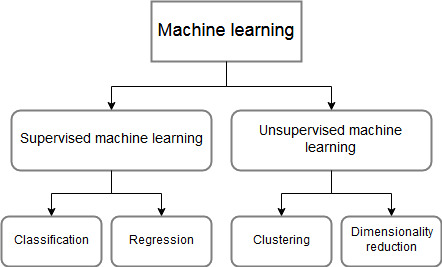

- In classification, the target variable is **discrete** (0/1, pass/fail, cancer/no cancer), which takes a known set of input variables and output or target variable.
- Trains a model to predictions for the new data.


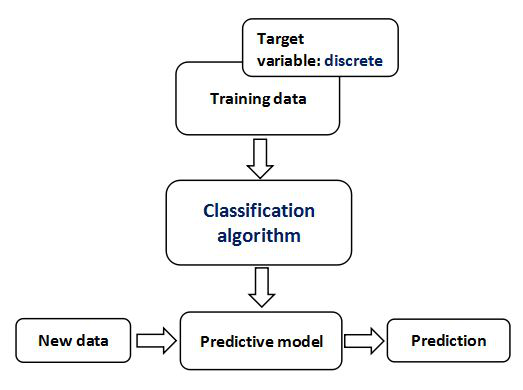

#### Import require libraries

In [1]:
import pandas as pd                    # For data frame manipulations
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")      # Not showing any warnings with in the Jupyter notebook

#### Reading data from local drive

In [2]:
data=pd.read_csv("C:/redpine_apssdc_fdp_june2020/CHD.csv")

#### Looking at first 5 observations in data

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,label
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


#### Looking at last 5 observations in data

In [4]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,label
457,214,0.4,5.98,31.72,2,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,2,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,2,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,2,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,1,62,14.70,0.00,46,1


### Data understanding

**Predicting coronary heart disease by using different classification algorithms**

**Variables**


- VI   Systolic blood pressure (Sbp)

- V2   Cumulative tobacco consumption (kg)

- V3   Low density lipoprotein (LDL-cholesterol)

- V4   Adiposity

- V5   Family history of heart disease (Present/Absent)

- V6   Type-A behavior

- V7   Obesity

- V8   Current alcohol consumption

- V9   Age during onset of condition


**Target variable**

- label: CHD response
    
- 0 **No coronary heart disease**

- 1 **Coronary heart diasese**

#### Study of number of observations and variables in a dataframe

In [5]:
data.shape

(462, 10)

**Target Variable**

- We will first look at the **target variable**, i.e., label. 
- As it is a **categorical variable**, 
- Let us look at its frequency table.
- Frequency table of a variable will give us the count of each category in that variable.

#### Number of observations both in CHD and NOCHD condition

In [6]:
data['label'].value_counts()

0    302
1    160
Name: label, dtype: int64

In [7]:
 data['label'].value_counts(normalize=True)

0    0.65368
1    0.34632
Name: label, dtype: float64

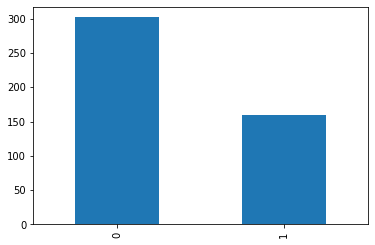

In [8]:
data['label'].value_counts().plot.bar()

- **Agenda**: Prediction of coronary heart disease using following classifiers (classification algorithms)
 
 1. Logistic regression
 2. k-nearest neighbors (KNN)
 3. Decision trees
 4. Support vector machines
 5. Random forest

### Model building

- Label encoding of target variable
- Used to convert categorical data, or text data, into numbers for predictive models which they can understand

In [9]:
from sklearn import preprocessing # importing library for label encoding
le = preprocessing.LabelEncoder()
le.fit(data['label'])
print(le.classes_)
y=le.transform(data['label'])

[0 1]


In [10]:
X = data.drop('label',axis=1)
y = data.label

- The dataset has been divided into training and testing part. 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

### Support vector machines SVM

- A Support Vector Machines (SVM) is a **discriminative classifier** formally defined by a separating **hyper-plane**. 

- SVM constructs a **hyper-plane** in a high dimensional space for classification and regression. 

- Separation is achieved by the **hyper-plane** that the largest distance to the nearest training data points of any class ( functional margin).

- The larger the margin the lower the generalization error of the classifier


#### Linear support vector machines

- In data the two classes are “linearly separable” i.e. one can draw a straight line in which all points on one side belong to the **first class** and points on the other side to the **second class**.
- **Linear SVM** approach is to find the straight line that gives the biggest separation between the classes i.e. the points are as far from the line as possible.

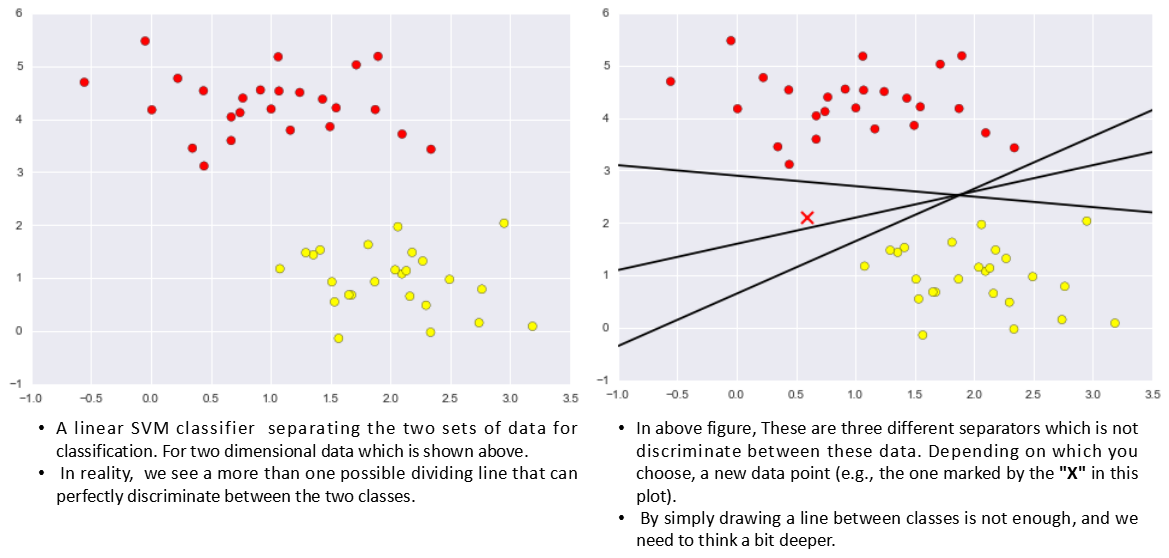

#### More than two predictors in Linear SVM?

- For example, with **three predictors** you want to find the plane that produces the largest separation between the classes.
- With more than three dimensions it becomes hard to visualize a plane but it still works. 
- Naturally, it can be separated using the **hyper-planes** which is beauty of linear SVM. 

#### Linear Support Vector Machines with Maximizing the Margin using hyper-planes

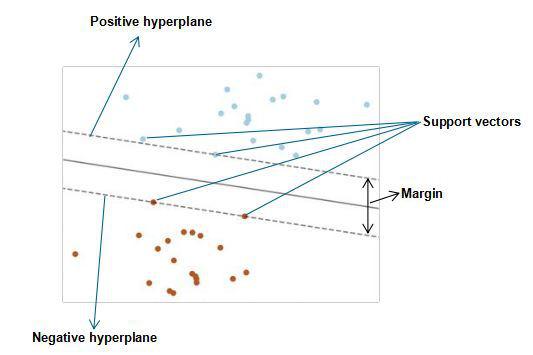

### Fitting a linear support vector machine

In [13]:
from sklearn.svm import SVC # "Support vector classifier"
model_linear_svm = SVC(kernel='linear', C=10)
model_linear_svm.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Modeling for training data

In [14]:
pred_train = model_linear_svm.predict(x_train)

#### Confusion matrix of training data

In [15]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0   1
Actual            
0          178  37
1           51  57


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#### Accuracy of training data

In [17]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.7275541795665634

Train precision: 0.6063829787234043

Train recall: 0.5277777777777778


#### Accuracy of cross-validated model

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scores = cross_val_score(model_linear_svm, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.48484848 0.81818182 0.75757576 0.71875    0.6875     0.71875
 0.75       0.65625    0.65625    0.84375   ]
Cross validated mean accuracy: 0.7091856060606061


#### Modeling for testing data

In [20]:
pred_cv = model_linear_svm.predict(x_cv)

#### Confusion matrix of testing data

In [21]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_cv), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          74  13
1          23  29


#### Accuracy of testing data

In [22]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.7410071942446043

Test precision: 0.6904761904761905

Test recall: 0.5576923076923077


### Non linear SVM - Beyond linear boundaries (Kernel SVM)

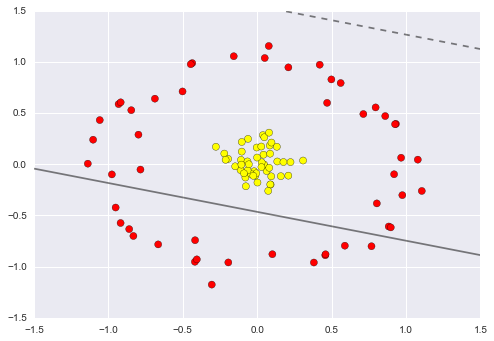

### What if decision boundary is not linear?

- It is clear that no linear discrimination will ever be able to separate this data.
- We compute a **radial basis function** for non-linear separation.

### Trick: Transform data into higher dimensional space.

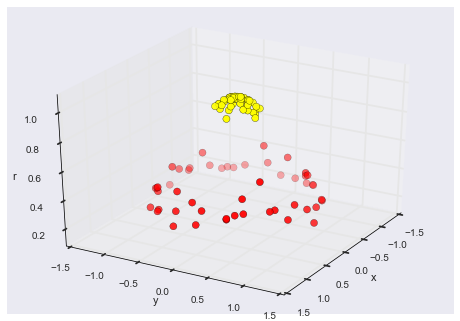

- In another dimension, the data becomes trivially linearly separable, by drawing a separating plane at r=0.7.
- We need to **tune the hyperparameters for the best **projection** using radial basis function for such clean and linearly separable results. 
- We need to automatically find the best basis functions to separate.
- This type of basis function transformation is known as a **kernel transformation**(**kernel trick**), as it is based on a similarity relationship (or kernel) between each pair of points.
- A potential problem with this strategy is projecting N points into N dimensions is that it might become very computationally intensive as N grows large. 
- Using kernel trick, a fit on kernel-transformed data can be done implicitly without ever building the full N dimensional representation of the kernel projection.
- This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

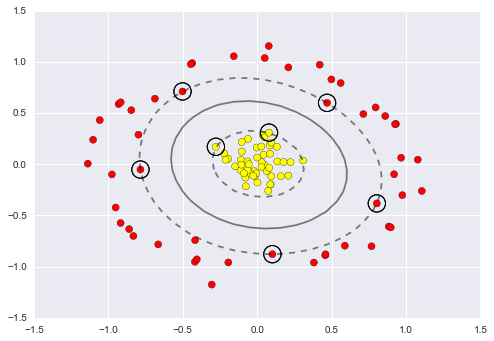

- Using this **kernelized support vector machine**, we can find a suitable nonlinear decision boundary. 
- This **kernel transformation** strategy is used often in fast **linear** methods into fast **nonlinear** methods for models in which the kernel trick can be applied.

### Fitting the Non-linear SVM

In [23]:
from sklearn.svm import SVC
clf_svm = SVC(C=1,gamma=0.1,kernel='rbf') 
clf_svm.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### - Tuning the SVM using **COST** parameter for softening margins

- if your data has some amount of **overlap**? see below figure
- The hardness of the **margin** is controlled by a tuning parameter **COST**

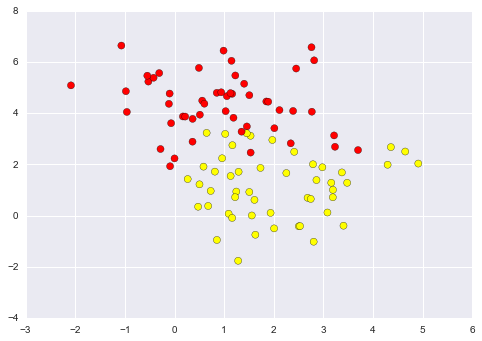

- We need to optimize the **cost** parameter for model fitting
- `C`` behaves as a **regularization** parameter in the SVM

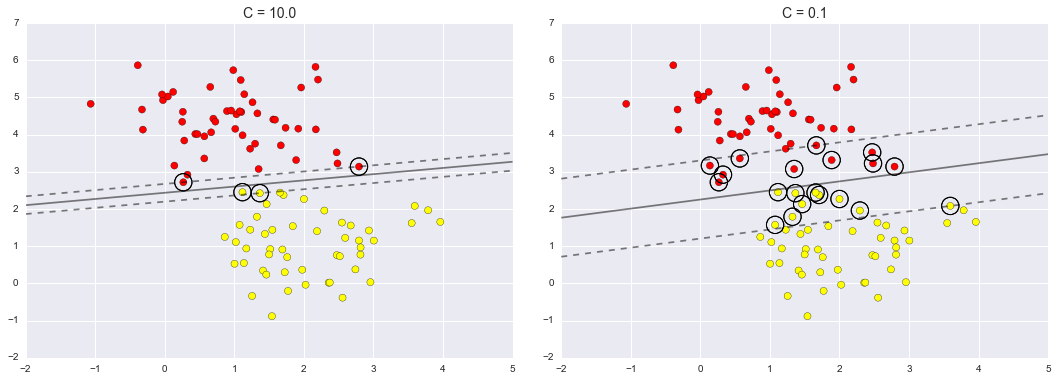

#### - Tuning the SVM using **gamma** parameter for support vectors

- The **gamma** parameter defines the radius of influence of samples selected by the model as support vectors.

#### Modeling for training data

In [24]:
pred_train = clf_svm.predict(x_train)

#### Confusion matrix of training data

In [25]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0    1
Actual             
0          215    0
1            0  108


#### Accuracy of training

In [26]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 1.0

Train precision: 1.0

Train recall: 1.0


#### Accuracy of cross-validation model

In [27]:
scores = cross_val_score(clf_svm, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.66666667 0.66666667 0.66666667 0.6875     0.6875     0.65625
 0.65625    0.65625    0.65625    0.65625   ]
Cross validated mean accuracy: 0.665625


#### Modeling for testing data

In [28]:
pred_train = clf_svm.predict(x_cv)

#### Confusion matrix of testing data

In [29]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0
Actual       
0          87
1          52


#### Accuracy of testing data

In [30]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.7410071942446043

Test precision: 0.6904761904761905

Test recall: 0.5576923076923077


### Random forests

#### Features of Random Forests 

 - An **ensemble of trees** and not just one tree.

 - Widely used algorithm in many applications.

 - One decision tree may prone to overfitting.

 - Many trees may prone to **generalization** and no overfitting.

### Random forest process

- Random variation into the process of building each decision tree. 
- This random variation during tree building happens in two ways.
- **First**, the data is selected randomly and **second**, the features chosen in each split are also randomly selected. 
- To create a random forest model you first decide on how many trees to build. 
- This is set using the **n_estimator** parameter for both **Random Forest Classifier** and **Random Forest Regressor**.

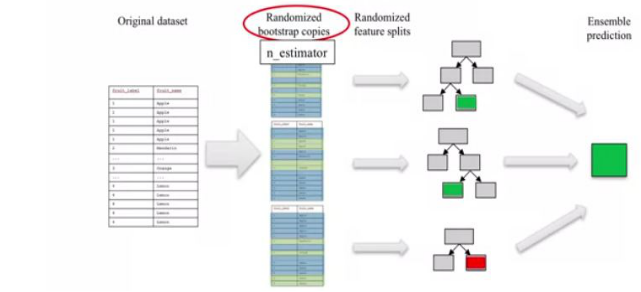

### Random forest process: Bootstrap sampling

- Each tree were built from a different random sample of the data called the bootstrap sampling. 
- Bootstrap samples are commonly used in machine learning of ensemble methods.

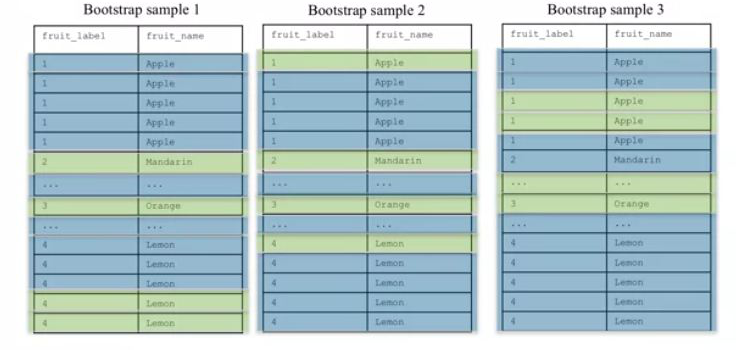

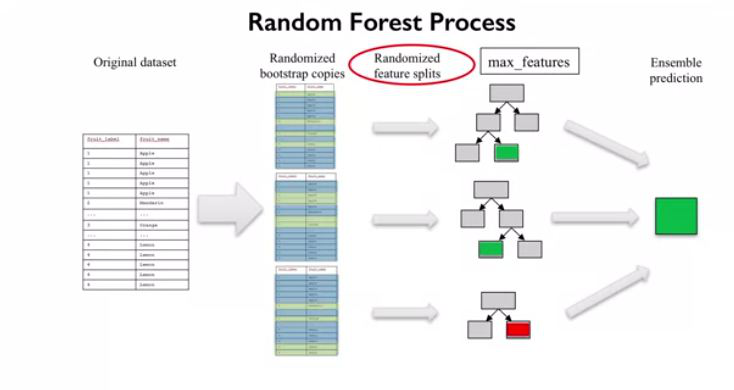

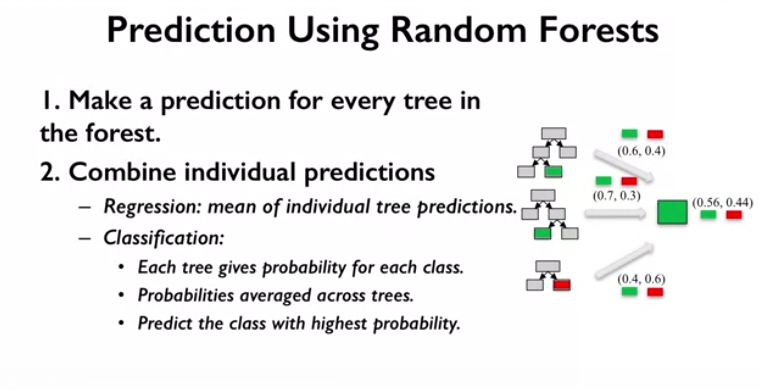

#### Import library

In [31]:
from sklearn.ensemble import RandomForestClassifier

### Fitting the random forest model

In [32]:
model_rf = RandomForestClassifier(random_state=1, max_depth=1,n_estimators=1)
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### Modeling for training data

In [33]:
pred_train = model_rf.predict(x_train)

#### Confusion matrix of training data

In [34]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0
Actual        
0          215
1          108


#### Accuracy of training

In [35]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.6656346749226006

Train precision: 0.0

Train recall: 0.0


#### Accuracy of cross-validation model

In [36]:
scores = cross_val_score(model_rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.63636364 0.75757576 0.66666667 0.5        0.6875     0.65625
 0.59375    0.65625    0.65625    0.65625   ]
Cross validated mean accuracy: 0.6466856060606061


#### Modeling for testing data

In [37]:
pred_cv = model_rf.predict(x_cv)

#### Confusion matrix of testing data

In [38]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_cv), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0
Actual       
0          87
1          52


#### Accuracy of testing data

In [39]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.6258992805755396

Test precision: 0.0

Test recall: 0.0


#### Hyper parameters tuning of random forest

#### Import library 

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper_para = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [42]:
grid_para = GridSearchCV(model_rf, hyper_para, cv = 3, verbose = 1, n_jobs = -1)
bestF = grid_para.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.6min finished


In [43]:
bestF.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [49]:
random_forest_optimization = RandomForestClassifier(random_state = 1, max_depth = 8,n_estimators = 500, 
                                   min_samples_split = 5, min_samples_leaf = 2)
                                   
model_optimal = random_forest_optimization.fit(x_train, y_train)

pred_train = model_optimal.predict(x_train)
pred_test = model_optimal.predict(x_cv)

In [50]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.9690402476780186

Train precision: 1.0

Train recall: 0.9074074074074074


In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, x_train, y_train, cv=3, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.61111111 0.66666667 0.6635514 ]
Cross validated mean accuracy: 0.6471097265489788


In [52]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_test))
print('\nTest precision:', precision_score(y_cv, pred_test))
print('\nTest recall:', recall_score(y_cv, pred_test))


Test accuracy: 0.697841726618705

Test precision: 0.6785714285714286

Test recall: 0.36538461538461536



## Resources

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)